### manipulate data

In [82]:
import pandas as pd

In [83]:
LAdata = pd.read_csv("Los_Angeles_port.csv")
LAdata.head()


,port_code,summary_time,year_month_day_hour,year_month_day,year_month,year,vessel_type,vessel_sub_type,vessel_sub2_type,moor_num,...,berth_duration,stay_duration,ref_key,remark,average_berth_num,average_moor_num,average_stay_num,average_berth_dwt,average_moor_dwt,average_stay_dwt
0,USLSA,2020-04-09 12:00:00+00:00,2020-04-09-20,2020/4/9,Apr-20,2020,20000,20500,20503.0,0,...,46.13,46.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USLSA,2020-04-27 04:00:00+00:00,2020-04-27-12,2020/4/27,Apr-20,2020,30000,30700,30702.0,2,...,NaN,33.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USLSA,2020-05-01 12:00:00+00:00,2020-05-01-20,2020/5/1,May-20,2020,40000,20300,20302.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USLSA,2020-05-06 00:00:00+00:00,2020-05-06-08,2020/5/6,May-20,2020,20000,20500,20504.0,0,...,55.62,55.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USLSA,2020-05-10 16:00:00+00:00,2020-05-11-00,2020/5/11,May-20,2020,20000,20500,20501.0,0,...,459.32,459.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
LAdata.columns

Index(['port_code', 'summary_time', 'year_month_day_hour', 'year_month_day',
       'year_month', 'year', 'vessel_type', 'vessel_sub_type',
       'vessel_sub2_type', 'moor_num', 'berth_num', 'moor_dwt', 'berth_dwt',
       'average_moor_duration', 'average_berth_duration',
       'average_stay_duration', 'update_time', 'stay_num', 'stay_dwt',
       'moor_duration', 'berth_duration', 'stay_duration', 'ref_key', 'remark',
       'average_berth_num', 'average_moor_num', 'average_stay_num',
       'average_berth_dwt', 'average_moor_dwt', 'average_stay_dwt'],
      dtype='object')

In [85]:
LAdata = LAdata.drop(['port_code', 'year_month_day_hour', 'year', 'year_month', 'year_month_day', 'ref_key', 'remark'], axis=1, errors='ignore')
LAdata.head()


,summary_time,vessel_type,vessel_sub_type,vessel_sub2_type,moor_num,berth_num,moor_dwt,berth_dwt,average_moor_duration,average_berth_duration,...,stay_dwt,moor_duration,berth_duration,stay_duration,average_berth_num,average_moor_num,average_stay_num,average_berth_dwt,average_moor_dwt,average_stay_dwt
0,2020-04-09 12:00:00+00:00,20000,20500,20503.0,0,2,0,175458,0.00,87.02,...,175458,NaN,46.13,46.13,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-04-27 04:00:00+00:00,30000,30700,30702.0,2,0,99500,0,25.46,40.81,...,99500,33.69,NaN,33.69,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-05-01 12:00:00+00:00,40000,20300,20302.0,0,0,0,0,NaN,90.38,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-05-06 00:00:00+00:00,20000,20500,20504.0,0,6,0,640974,0.00,69.36,...,640974,NaN,55.62,55.62,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-05-10 16:00:00+00:00,20000,20500,20501.0,0,4,0,126702,0.00,16.71,...,126702,NaN,459.32,459.32,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
drop_index = LAdata[LAdata['stay_num']==0].index
raw_data = LAdata.drop(drop_index)


In [87]:
raw_data['total_moor_duration'] = raw_data['moor_duration'] * raw_data['moor_num']
raw_data['total_berth_duration'] = raw_data['berth_duration'] * raw_data['berth_num']
raw_data['total_stay_duration'] = raw_data['stay_duration'] * raw_data['stay_num']
raw_data.head()

,summary_time,vessel_type,vessel_sub_type,vessel_sub2_type,moor_num,berth_num,moor_dwt,berth_dwt,average_moor_duration,average_berth_duration,...,stay_duration,average_berth_num,average_moor_num,average_stay_num,average_berth_dwt,average_moor_dwt,average_stay_dwt,total_moor_duration,total_berth_duration,total_stay_duration
0,2020-04-09 12:00:00+00:00,20000,20500,20503.0,0,2,0,175458,0.00,87.02,...,46.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.26,92.26
1,2020-04-27 04:00:00+00:00,30000,30700,30702.0,2,0,99500,0,25.46,40.81,...,33.69,NaN,NaN,NaN,NaN,NaN,NaN,67.38,NaN,67.38
3,2020-05-06 00:00:00+00:00,20000,20500,20504.0,0,6,0,640974,0.00,69.36,...,55.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,333.72,333.72
4,2020-05-10 16:00:00+00:00,20000,20500,20501.0,0,4,0,126702,0.00,16.71,...,459.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1837.28,1837.28
5,2020-03-31 16:00:00+00:00,20000,20500,20503.0,0,2,0,162004,0.00,66.70,...,43.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.06,86.06


In [88]:
def fill_total_berth_duration(row):
    if pd.isna(row['total_berth_duration']) and row['total_stay_duration'] == row['total_moor_duration']:
        return 0  
    else:
        return row['total_berth_duration']
    
raw_data['total_berth_duration'] = raw_data.apply(fill_total_berth_duration, axis=1)


In [89]:
raw_data.isnull().sum()

summary_time                  0
vessel_type                   0
vessel_sub_type               0
vessel_sub2_type          11536
moor_num                      0
berth_num                     0
moor_dwt                      0
berth_dwt                     0
average_moor_duration     10596
average_berth_duration    21513
average_stay_duration     21513
update_time                   0
stay_num                      0
stay_dwt                      0
moor_duration             50947
berth_duration            15963
stay_duration                 0
average_berth_num         68372
average_moor_num          65030
average_stay_num          68372
average_berth_dwt         68372
average_moor_dwt          65030
average_stay_dwt          68372
total_moor_duration       50947
total_berth_duration          0
total_stay_duration           0
dtype: int64

In [90]:
# 如果 moor_num==0,让 total_moor_duration = 0
def fill_total_moor_duration(row):
    if pd.isna(row['total_moor_duration']) and row['moor_num'] == 0:
        return 0  
    else:
        return row['total_moor_duration']  # 保持原来的值

# 使用 apply 方法更新 total_berth_duration 列
raw_data['total_moor_duration'] = raw_data.apply(fill_total_moor_duration, axis=1)

In [91]:
raw_data.isnull().sum()

summary_time                  0
vessel_type                   0
vessel_sub_type               0
vessel_sub2_type          11536
moor_num                      0
berth_num                     0
moor_dwt                      0
berth_dwt                     0
average_moor_duration     10596
average_berth_duration    21513
average_stay_duration     21513
update_time                   0
stay_num                      0
stay_dwt                      0
moor_duration             50947
berth_duration            15963
stay_duration                 0
average_berth_num         68372
average_moor_num          65030
average_stay_num          68372
average_berth_dwt         68372
average_moor_dwt          65030
average_stay_dwt          68372
total_moor_duration           0
total_berth_duration          0
total_stay_duration           0
dtype: int64

In [92]:
# create a new dataframe
data = pd.DataFrame()

# 顺序从2020->2024
data['summary_time'] = sorted(raw_data['summary_time'].unique())
data['moor_num'] = raw_data.groupby('summary_time')['moor_num'].sum().values
data['berth_num'] = raw_data.groupby('summary_time')['berth_num'].sum().values
data['stay_num'] = raw_data.groupby('summary_time')['stay_num'].sum().values
data['moor_dwt'] = raw_data.groupby('summary_time')['moor_dwt'].sum().values
data['berth_dwt'] = raw_data.groupby('summary_time')['berth_dwt'].sum().values
data['stay_dwt'] = raw_data.groupby('summary_time')['stay_dwt'].sum().values

data['total_moor_duration'] = raw_data.groupby('summary_time')['total_moor_duration'].sum().values
data['total_berth_duration'] = raw_data.groupby('summary_time')['total_berth_duration'].sum().values
data['total_stay_duration'] = raw_data.groupby('summary_time')['total_stay_duration'].sum().values

data

,summary_time,moor_num,berth_num,stay_num,moor_dwt,berth_dwt,stay_dwt,total_moor_duration,total_berth_duration,total_stay_duration
0,2020-01-02 16:00:00+00:00,2,0,2,124551,0,124551,58.29,0.00,58.29
1,2020-01-02 20:00:00+00:00,1,0,1,49999,0,49999,51.85,0.00,51.85
2,2020-01-03 00:00:00+00:00,1,0,1,49999,0,49999,55.85,0.00,55.85
3,2020-01-03 04:00:00+00:00,2,0,2,124997,0,124997,63.54,0.00,63.54
4,2020-01-03 08:00:00+00:00,2,1,3,124997,15154,140151,71.54,0.92,72.46
...,...,...,...,...,...,...,...,...,...,...
10701,2024-11-20 16:00:00+00:00,3,17,20,247121,1557865,1804986,211.35,967.03,1198.18
10702,2024-11-20 20:00:00+00:00,2,17,19,131410,1557865,1689275,177.77,1035.03,1232.60
10703,2024-11-21 00:00:00+00:00,1,18,19,58628,1605744,1664372,174.89,1106.78,1301.47
10704,2024-11-21 04:00:00+00:00,1,14,15,58628,1315108,1373736,178.89,946.50,1145.19


In [93]:
import numpy as np
data['average_moor_duration'] = np.where(
    data['moor_num'] != 0, 
    data['total_moor_duration'] / data['moor_num'], 
    0  # 当 berth_num 为 0 时，设置0
)


In [94]:
data['average_berth_duration'] = np.where(
    data['berth_num'] != 0, 
    data['total_berth_duration'] / data['berth_num'], 
    0  # 当 berth_num 为 0 时，设置0
)

In [95]:
data['average_stay_duration'] = np.where(
    data['stay_num'] != 0, 
    data['total_stay_duration'] / data['stay_num'], 
    0  # 当 stay_num 为 0 时，设置0
)


In [96]:
data.head()

,summary_time,moor_num,berth_num,stay_num,moor_dwt,berth_dwt,stay_dwt,total_moor_duration,total_berth_duration,total_stay_duration,average_moor_duration,average_berth_duration,average_stay_duration
0,2020-01-02 16:00:00+00:00,2,0,2,124551,0,124551,58.29,0.00,58.29,29.145,0.00,29.145000
1,2020-01-02 20:00:00+00:00,1,0,1,49999,0,49999,51.85,0.00,51.85,51.850,0.00,51.850000
2,2020-01-03 00:00:00+00:00,1,0,1,49999,0,49999,55.85,0.00,55.85,55.850,0.00,55.850000
3,2020-01-03 04:00:00+00:00,2,0,2,124997,0,124997,63.54,0.00,63.54,31.770,0.00,31.770000
4,2020-01-03 08:00:00+00:00,2,1,3,124997,15154,140151,71.54,0.92,72.46,35.770,0.92,24.153333


In [97]:
path = '/Users/aurora/Desktop/中远海科合作项目/论文解读/stage 2/DeepAnT/data/updated_rawdata/Processed_LAData.csv'
data.to_csv(path, index=False)


### smooth the data (by Gaussian)

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def gaussian_kernel(size, sigma=2):
    x = np.linspace(-(size // 2), size // 2, size)
    g = np.exp(-0.5 * (x / sigma) ** 2)
    return g / g.sum()

def apply_gaussian_smoothing(data_column, kernel_size=5, sigma=2):
    kernel = gaussian_kernel(kernel_size, sigma)
    smoothed_data = np.convolve(data_column, kernel, mode='same')
    return smoothed_data

def choose_parameters(data_length):
    kernel_size = max(5, int(data_length * 0.03))
    # sigma = kernel_size / 30
    sigma = 10
    return kernel_size, sigma

smoothed_data = data.copy()
data_length = len(data)
kernel_size, sigma = choose_parameters(data_length)

for col in data.columns:
    if col != 'summary_time':
        smoothed_data[col] = apply_gaussian_smoothing(data[col], kernel_size, sigma)




In [79]:
data.head()

,summary_time,moor_num,berth_num,stay_num,moor_dwt,berth_dwt,stay_dwt,total_moor_duration,total_berth_duration,total_stay_duration,average_moor_duration,average_berth_duration,average_stay_duration
0,2020-01-02 16:00:00+00:00,2,0,2,124551,0,124551,58.29,0.00,58.29,29.145,0.00,29.145000
1,2020-01-02 20:00:00+00:00,1,0,1,49999,0,49999,51.85,0.00,51.85,51.850,0.00,51.850000
2,2020-01-03 00:00:00+00:00,1,0,1,49999,0,49999,55.85,0.00,55.85,55.850,0.00,55.850000
3,2020-01-03 04:00:00+00:00,2,0,2,124997,0,124997,63.54,0.00,63.54,31.770,0.00,31.770000
4,2020-01-03 08:00:00+00:00,2,1,3,124997,15154,140151,71.54,0.92,72.46,35.770,0.92,24.153333


In [107]:
smoothed_data.head()

,summary_time,moor_num,berth_num,stay_num,moor_dwt,berth_dwt,stay_dwt,total_moor_duration,total_berth_duration,total_stay_duration,average_moor_duration,average_berth_duration,average_stay_duration
0,2020-01-02 16:00:00+00:00,0.983312,0.289123,1.272435,60016.881381,6123.220756,66140.102137,47.252026,2.229062,49.628647,25.082128,2.058398,21.433866
1,2020-01-02 20:00:00+00:00,1.065002,0.321100,1.386101,65021.775816,6927.614695,71949.390511,51.514310,2.502913,54.212341,27.130918,2.289896,23.108657
2,2020-01-03 00:00:00+00:00,1.146319,0.354660,1.500979,69998.810194,7799.121043,77797.931237,55.785004,2.798757,58.839250,29.156331,2.534881,24.754803
3,2020-01-03 04:00:00+00:00,1.226388,0.389685,1.616074,74891.814059,8739.126348,83630.940407,60.010429,3.117922,63.459626,31.133548,2.793475,26.352776
4,2020-01-03 08:00:00+00:00,1.304337,0.426046,1.730383,79644.406551,9748.807520,89393.214071,64.134696,3.461945,68.021992,33.037889,3.065954,27.883692


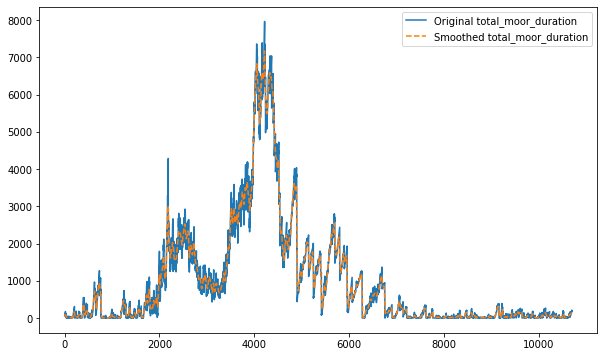

In [111]:
plt.figure(figsize=(10, 6))
plt.plot(data['total_moor_duration'], label='Original total_moor_duration')
plt.plot(smoothed_data['total_moor_duration'], label='Smoothed total_moor_duration', linestyle='--')
plt.legend()
plt.show()


In [109]:
smooth_path = '/Users/aurora/Desktop/中远海科合作项目/论文解读/stage 2/DeepAnT/data/smoothed_data/smoothed_LA_data.csv'
smoothed_data.to_csv(smooth_path, index=False)
